In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [27]:
df_train = pd.read_csv(r'C:\Users\pablo\Downloads\j0001_train.csv')#Carga de los datos de entrenamiento
df_test = pd.read_csv(r'C:\Users\pablo\Downloads\j0001_X_test.csv')#Carga de los datos de test

In [28]:
df_train#Primera visualizacion de los datos

,feature1,feature2,feature3,feature4,target
0,0.885598,-0.058136,-0.502394,-0.072880,4.999557
1,1.391696,0.350938,0.311445,-0.780685,56.613234
2,-0.599735,-0.072272,1.541158,-0.384914,43.374539
3,1.108150,1.924439,-0.068485,1.985521,50.226308
4,-0.724598,-1.485027,-1.755203,-0.254649,-107.187888
...,...,...,...,...,...
2095,0.130763,1.560848,-0.406230,-1.193847,4.446527
2096,-1.449036,0.895524,-0.604010,1.068092,-56.483931
2097,1.379620,-1.054016,0.653151,-0.149767,54.718814
2098,0.455116,0.338073,0.437893,0.728918,34.350769


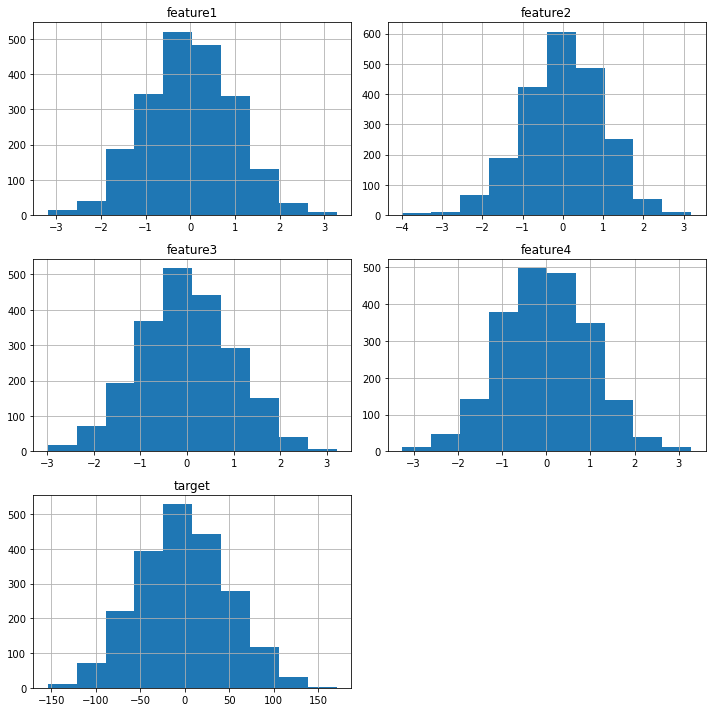

In [29]:
df_train.hist(figsize = (10, 10))#Histograma con los valores de las categorias
plt.tight_layout()
plt.show()

In [30]:
#Eliminacion de outliers
#find Q1, Q3, and interquartile range for each column
Q1 = df_train.quantile(q=.25)
Q3 = df_train.quantile(q=.75)
IQR = df_train.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_train[~((df_train < (Q1-1.5*IQR)) | (df_train > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(2045, 5)

In [32]:
y = df_train['target']#Preparacion de los datos para su clasificacion
X = df_train.copy()
X = df_train.drop(df_train[['target']], axis=1)

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

puntuacion  = reg.score(X, y)
print(puntuacion)

prediccion = reg.predict(df_test)

1.0


In [35]:
prediccion

array([ 4.97687705e+01, -2.60976422e+01,  1.18922007e+01,  3.21672141e+01,
       -3.59735010e+01, -6.66045499e+01, -1.15629449e+00, -6.39636966e+01,
       -2.11476453e+01,  8.42146253e+01,  6.66583903e+01, -2.00629613e+01,
       -4.90022209e+01, -7.82987698e+00, -7.43664691e+00,  8.72004146e+01,
       -1.08904075e+02,  3.22233960e+01,  2.06682623e+01,  5.71097115e+01,
       -5.23749244e+01,  3.36475224e+01,  1.38698642e+01,  8.98125863e+00,
        1.23607846e+01,  7.29382263e-01,  6.11988475e+01, -1.36376208e+01,
       -1.68084246e+01,  4.79375828e-01, -4.78494622e+01,  8.32964203e+00,
       -1.43645239e+01, -4.30093808e+01,  7.52389255e+00,  3.70966546e+01,
       -8.24754769e+01,  3.53989239e+01,  1.86041395e+00, -2.79892839e+01,
       -6.52616405e+01, -1.04436195e+00,  6.77329291e+01,  1.25227596e+01,
       -4.11997606e+01, -4.53540111e+01, -5.23712208e+01,  4.98122925e+01,
        8.37701654e+00, -4.00674487e+01, -3.25869426e+01, -3.76689527e-01,
        4.38959931e+01, -

In [38]:
results  = pd.DataFrame(prediccion)

In [40]:
results.to_csv('results.csv', index=False) 